# Image Segmentation on Forest Imagery

CSC 522 Fall 2024

- Anthony Wu, awu3
- Jheel Gala, jgala	
- Ophelia Sin, oysin
- Venkata Sai Praveen Gunda, vgunda



In [7]:
### importing required packages

import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from PIL import Image

## Data Preprocessing

In [8]:
base_dir = 'data/'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

In [9]:
# List dataset files
train_files = tf.data.Dataset.list_files(str(train_dir + '/*/*.tiff'), shuffle=True)
val_files = tf.data.Dataset.list_files(str(val_dir + '/*/*.tiff'), shuffle=True)
test_files = tf.data.Dataset.list_files(str(test_dir + '/*/*.tiff'), shuffle=True)

In [ ]:
def load_and_preprocess_image(path):
    with Image.open(path) as img:
        img = img.resize((224, 224))
        print(img)
        img_array = np.array(img)
        print("Image shape:", img_array.shape)
        img_array = img_array / 255.0  # Normalize image data to 0-1
    return np.array(img_array, dtype=np.float32)

In [ ]:
def process_path(file_path):
    label = tf.strings.split(file_path, os.sep)[-2]  # Extract class label from folder name in file path 
    label = tf.where(label == 'forest', 0, 1)  # Convert labels to numeric
    img = tf.numpy_function(load_and_preprocess_image, [file_path], tf.float32)
    img = tf.reshape(img, [224, 224, 3])
    return img, label

In [12]:
# Resizing image to 224 x 224, labeling images based on file_path
train_dataset = train_files.map(process_path)
val_dataset = val_files.map(process_path)
test_dataset = test_files.map(process_path)

### Visualizing the Images

<PIL.Image.Image image mode=RGB size=224x224 at 0x157AA4B00>
Image shape: (224, 224, 3)
<PIL.Image.Image image mode=RGB size=224x224 at 0x151516A50>
Image shape: (224, 224, 3)


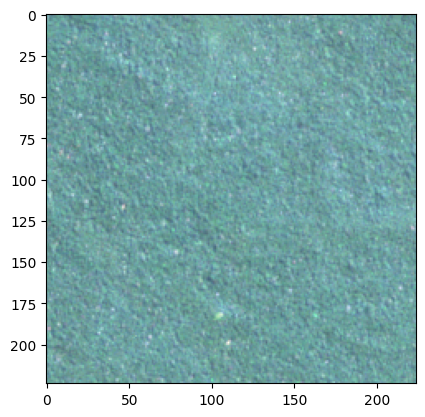

In [13]:
image, label = next(iter(train_dataset))
_ = plt.imshow(image)
#_ = plt.title(get_label_name(label))

### Preparing data for Training

In [ ]:
def prepare_for_training(ds, batch_size=32):
    ds = ds.shuffle(buffer_size=1000)
    ds = ds.repeat()
    ds = ds.batch(batch_size)
    # add augmentation here
    
    ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
    return ds

In [25]:
# Prepare for training
train_dataset = prepare_for_training(train_dataset)
val_dataset = prepare_for_training(val_dataset)
test_dataset = prepare_for_training(test_dataset, batch_size=1)

## Modeling